###Содержание


Шаг 0: Импортируем библиотеки


Шаг 1: Разведочный анализ данных (EDA-анализ)

1.) Краткий обзор (эконометрика)

- Статус-кво

- Извлечение тренда за все время

- Анализ сезонности

- Остатки (после детрендинга) 

2.) Очистка Данных (подготовка к статистическому анализу )

- Избавляемся от нулевых значений

3.) Статистический анализ (обнаружение корреляций и инсайтов)

- Одномерный/One-variate (анализ значений конкретного столбца)

- Двумерный/Bi-variate (анализ взаимосвязи между значениями столбцов)

4.) Работа с выбросами (удаление уникальных событий, искажающих реальное положение дел)

- Идентификация и удаление

- Визуализация измененного датафрейма

5.)  Нормализация данных/feature scaling (подготовка данных к моделей машинного обучения)


Импортируем библиотеки

In [28]:
import os
import pandas as pd
import numpy as np
import math
import datetime as dt
import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sns
import statsmodels.api as sm
import warnings
from pandas.core.nanops import nanmean as pd_nanmean

# Библиотеки для проведения оценки

from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler

Импортируем данные

In [29]:
def loadPrices(fileName):
    data = pd.read_csv(fileName)
    return data

dfMain = loadPrices('BTC-USD.csv') 

###Разведочный анализ данных (EDA-analysis)

1.) Краткий обзор.

In [ ]:
dfMain.sort_values('Date', axis = 0, inplace = True)

df1 = dfMain.drop('Date', axis=1)
df1 = df.iloc[-1827:]
df1['Date'] = pd.to_datetime(df.Date, format = '%Y-%m-%d %H:%M:%S')
df1.index = df1.Date
df1.drop('Date', axis = 1, inplace = True)

df1.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-04-26,8867.320313,9281.509766,8727.089844,9281.509766,9281.509766,8970559488
2018-04-27,9290.629883,9375.469727,8987.049805,8987.049805,8987.049805,7566289920
2018-04-28,8939.269531,9412.089844,8931.990234,9348.480469,9348.480469,7805479936
2018-04-29,9346.410156,9531.490234,9193.709961,9419.080078,9419.080078,8853000192
2018-04-30,9426.110352,9477.139648,9166.809570,9240.549805,9240.549805,8673920000


<Axes: title={'center': 'Bitcoin price'}, xlabel='Date'>

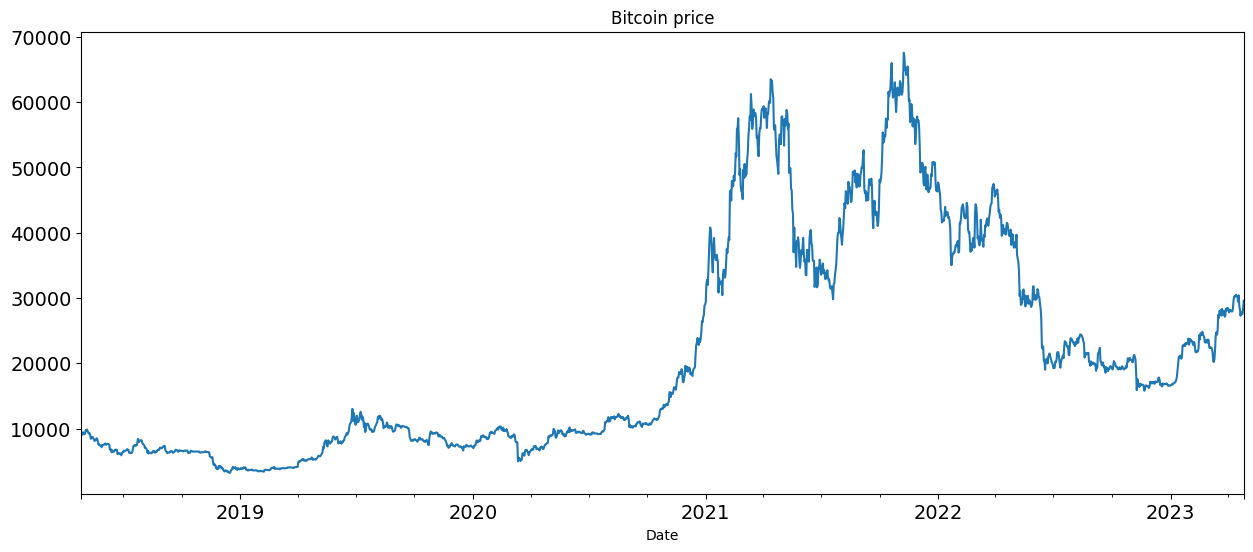

In [ ]:
#Визуализация статус-кво

df1.Close.plot(figsize=(15,6), title = 'Bitcoin price', fontsize=14)

In [ ]:
dfMain.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-04-26,8867.320313,9281.509766,8727.089844,9281.509766,9281.509766,8970559488
1,2018-04-27,9290.629883,9375.469727,8987.049805,8987.049805,8987.049805,7566289920
2,2018-04-28,8939.269531,9412.089844,8931.990234,9348.480469,9348.480469,7805479936
3,2018-04-29,9346.410156,9531.490234,9193.709961,9419.080078,9419.080078,8853000192
4,2018-04-30,9426.110352,9477.139648,9166.809570,9240.549805,9240.549805,8673920000


In [ ]:
dfMain.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1822,2023-04-22,27265.894531,27872.142578,27169.570313,27817.500000,27817.500000,13125734602
1823,2023-04-23,27816.144531,27820.244141,27400.314453,27591.384766,27591.384766,12785446832
1824,2023-04-24,27591.730469,27979.982422,27070.849609,27525.339844,27525.339844,17703288330
1825,2023-04-25,27514.873047,28371.078125,27207.931641,28307.597656,28307.597656,17733373139
1826,2023-04-26,28281.115234,29995.837891,28262.826172,29588.136719,29588.136719,25888149504


In [ ]:
dfMain.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1827 entries, 0 to 1826
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1827 non-null   object 
 1   Open       1827 non-null   float64
 2   High       1827 non-null   float64
 3   Low        1827 non-null   float64
 4   Close      1827 non-null   float64
 5   Adj Close  1827 non-null   float64
 6   Volume     1827 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 114.2+ KB


Text(0.5, 1.0, '3-Month Rolling Mean')

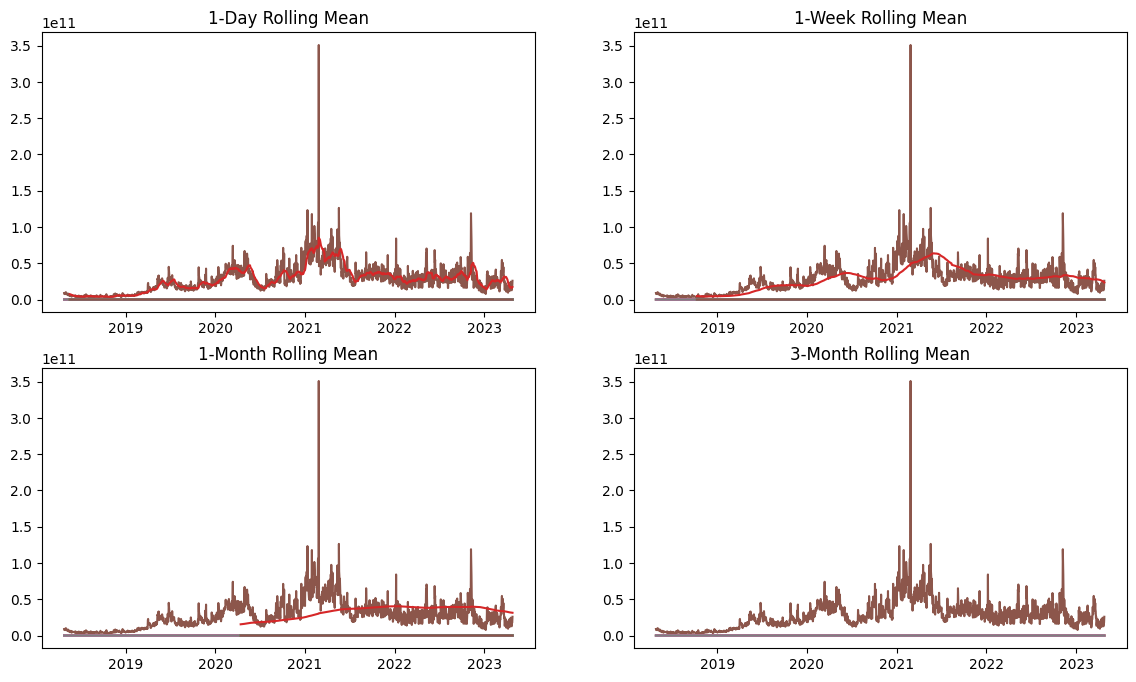

In [ ]:
#Извлечение тренда из графика стоимости биткоина через подсчет скользящей средней "Rolling Mean"

fig, axes = plt.subplots(2,2, sharey=False, sharex=False)
fig.set_figwidth(14)
fig.set_figheight(8)

window = 24
axes[0][0].plot(df1.index, df1, label='Original')
axes[0][0].plot(df1.index, df1.rolling(window=window).mean())
axes[0][0].set_title("1-Day Rolling Mean")

window = 24*7
axes[0][1].plot(df1.index, df1, label='Original')
axes[0][1].plot(df1.index, df1.rolling(window=window).mean())
axes[0][1].set_title("1-Week Rolling Mean")

window = 24*30
axes[1][0].plot(df1.index, df1, label='Original')
axes[1][0].plot(df1.index, df1.rolling(window=window).mean())
axes[1][0].set_title("1-Month Rolling Mean")

window = 24*30*3
axes[1][1].plot(df1.index, df1, label='Original')
axes[1][1].plot(df1.index, df1.rolling(window=window).mean())
axes[1][1].set_title("3-Month Rolling Mean")


#Наблюдения:

#Как мы можем видеть, на последнем графике (ежеквартальный) - тренд просто исчез. Его невозможно извлечь
#Следовательно, тренды на длинных дистанциях попросту отсутствуют
#Т.е. у нас отсутствует устойчивое, систематическое изменение значений временного ряда в течение достаточно долгого периода

#Месяц - максимально допустимая длина тренда
#В основном, все происходит на крайне коротких дистанциях и может являются лишь быстрым всплеском 
#Это и делает бесмысленым применение эконометрической модели для прогнозирования на дистанции свыше недели (ARIMA и прочие)

In [ ]:
#Анализ сезонности

rcParams['figure.figsize'] = 20, 5
df1['Year'] = df1.index.year
df1['Month'] = df1.index.month
df1_pivot = pd.pivot_table(df1, values = 'Close', columns = 'Year', index = 'Month')

df1.head()

,Open,High,Low,Close,Adj Close,Volume,Year,Month
Date,,,,,,,,
2018-04-26,8867.320313,9281.509766,8727.089844,9281.509766,9281.509766,8970559488,2018,4
2018-04-27,9290.629883,9375.469727,8987.049805,8987.049805,8987.049805,7566289920,2018,4
2018-04-28,8939.269531,9412.089844,8931.990234,9348.480469,9348.480469,7805479936,2018,4
2018-04-29,9346.410156,9531.490234,9193.709961,9419.080078,9419.080078,8853000192,2018,4
2018-04-30,9426.110352,9477.139648,9166.809570,9240.549805,9240.549805,8673920000,2018,4


<Axes: xlabel='Month'>

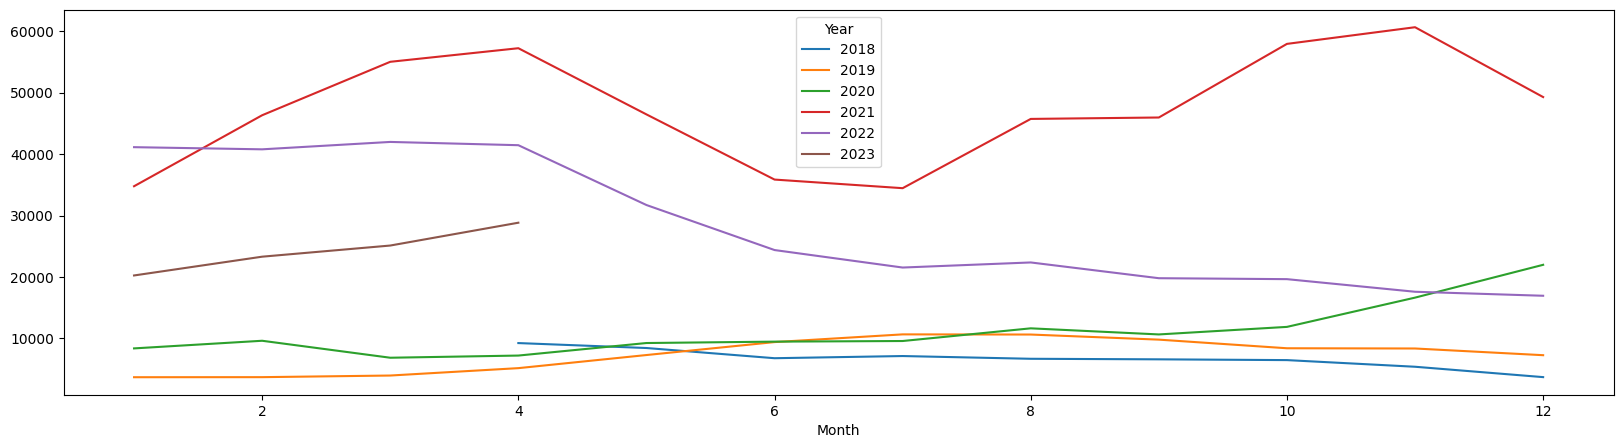

In [ ]:
#Визуализируем результаты анализа сезонности

df1_pivot.plot()

#График отлично разоблачает миф о наличии какой-либо ежегодной сезонности для биткоина => сезонная декомпозиция бесмысленна

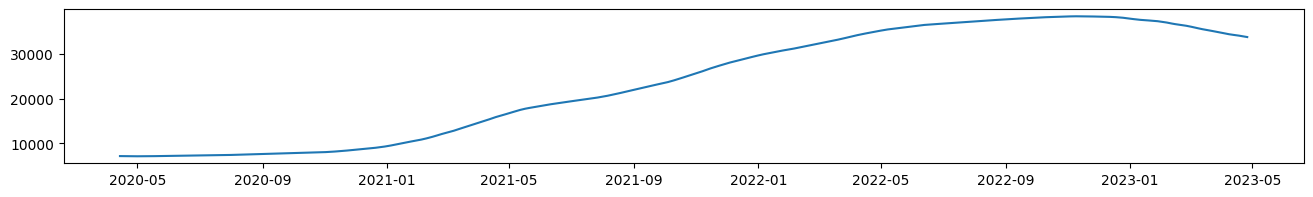

In [ ]:
#Monthly rolling mean

plt.figure(figsize=(16,2))

MA = df1.Close.rolling(window=24*30).mean()
plt.plot(MA)
plt.show()

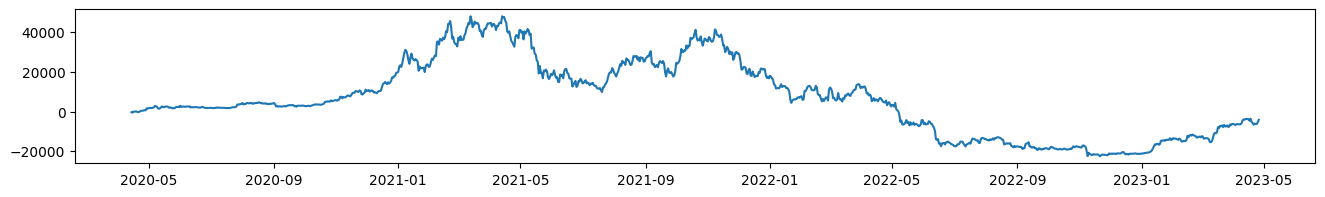

In [ ]:
#Let remove monthly trend

detrend = df1.Close - MA
plt.figure(figsize=(16,2))
plt.plot(detrend)

Шаг 2: Очистка данных

In [ ]:
# Избавляемся только от нулевых значений; конкретно в нашем случае - всё просто

df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

Шаг 3: Статистический анализ

In [ ]:
dfMain.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1827.000000,1827.000000,1827.000000,1827.000000,1827.000000,1.827000e+03
mean,21228.368343,21736.710481,20670.205105,21237.567919,21237.567919,2.753829e+10
std,16805.432249,17248.342273,16289.959958,16799.503140,16799.503140,1.940631e+10
min,3236.274658,3275.377930,3191.303467,3236.761719,3236.761719,2.923670e+09
25%,7911.853027,8087.814454,7684.758545,7910.579834,7910.579834,1.543955e+10
50%,13031.201172,13329.183594,12885.747070,13075.248047,13075.248047,2.530321e+10
75%,33767.375000,34778.076172,32265.797851,33734.515625,33734.515625,3.613765e+10
max,67549.734375,68789.625000,66382.062500,67566.828125,67566.828125,3.509679e+11


<ipython-input-66-aa4f4450a243>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

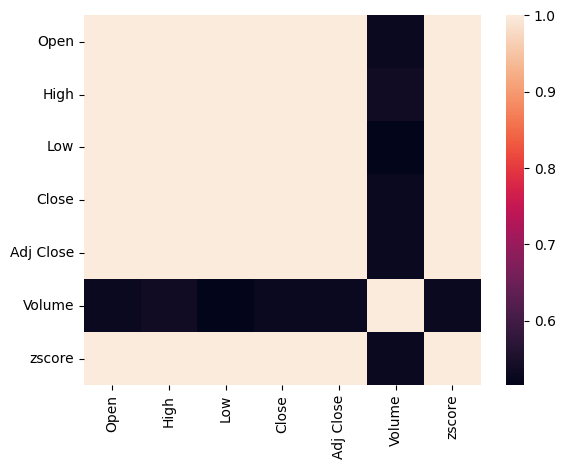

In [ ]:
sns.heatmap(dfMain.corr()) #Карта корреляций

Одномерный анализ (One-variate analysis)

<ipython-input-12-f9530745b3cb>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['Open'], hist=False)


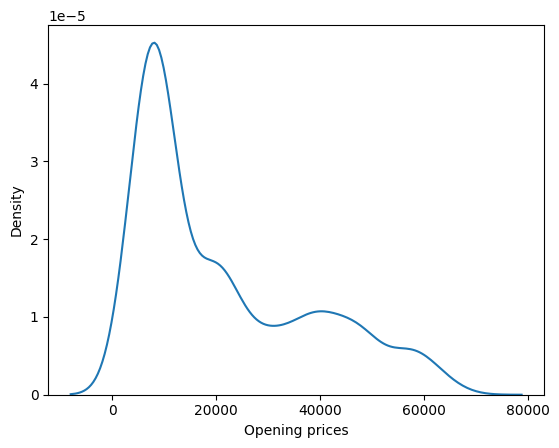

the mean value of the Opening prices is around :  21228.36834291954
the median value of the Opening prices is around :  13031.201172
the iqr value of the Opening prices is around :  25855.521972999995


In [ ]:
sns.distplot(df1['Open'], hist=False)
plt.xlabel('Opening prices')
plt.show()

#Наблюдения : 
print("the mean value of the Opening prices is around : ", df1['Open'].mean())
print("the median value of the Opening prices is around : ", df1['Open'].median())
print("the iqr value of the Opening prices is around : ", df1['Open'].quantile(0.75)-df1['Open'].quantile(0.25))

<ipython-input-13-c88943e1ed4e>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['Close'], hist=False)


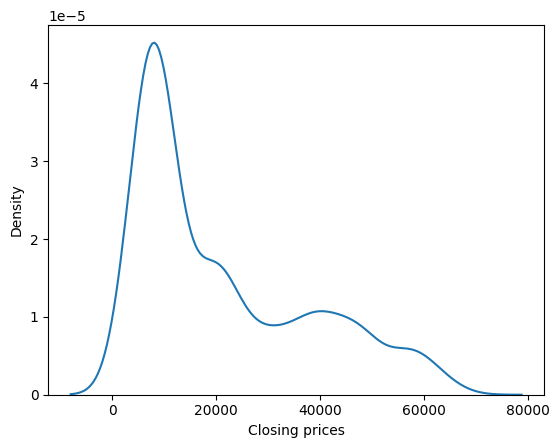

the mean value of the Closing prices is around :  21237.567918708814
the median value of the Closing prices is around :  13075.248047
the iqr value of the Closing prices is around :  25823.935791


In [ ]:
sns.distplot(df1['Close'], hist=False)
plt.xlabel('Closing prices')
plt.show()

#Наблюдения : 
print("the mean value of the Closing prices is around : ", df1['Close'].mean())
print("the median value of the Closing prices is around : ", df1['Close'].median())
print("the iqr value of the Closing prices is around : ", df1['Close'].quantile(0.75)-df1['Close'].quantile(0.25))

0       -4.141895
1        3.035801
2       -4.092109
3       -0.726699
4        1.855605
          ...    
1822    -5.516055
1823     2.247598
1824     0.663906
1825    -7.927246
1826   -13.070215
Length: 1827, dtype: float64


<ipython-input-21-f1d11e03cb6b>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ReturnsInPct, hist=False)


the mean value of the Closing prices is around :  -0.09199575789272013
the median value of the Closing prices is around :  -0.05790038999999524
the iqr value of the Closing prices is around :  4.482021485000023


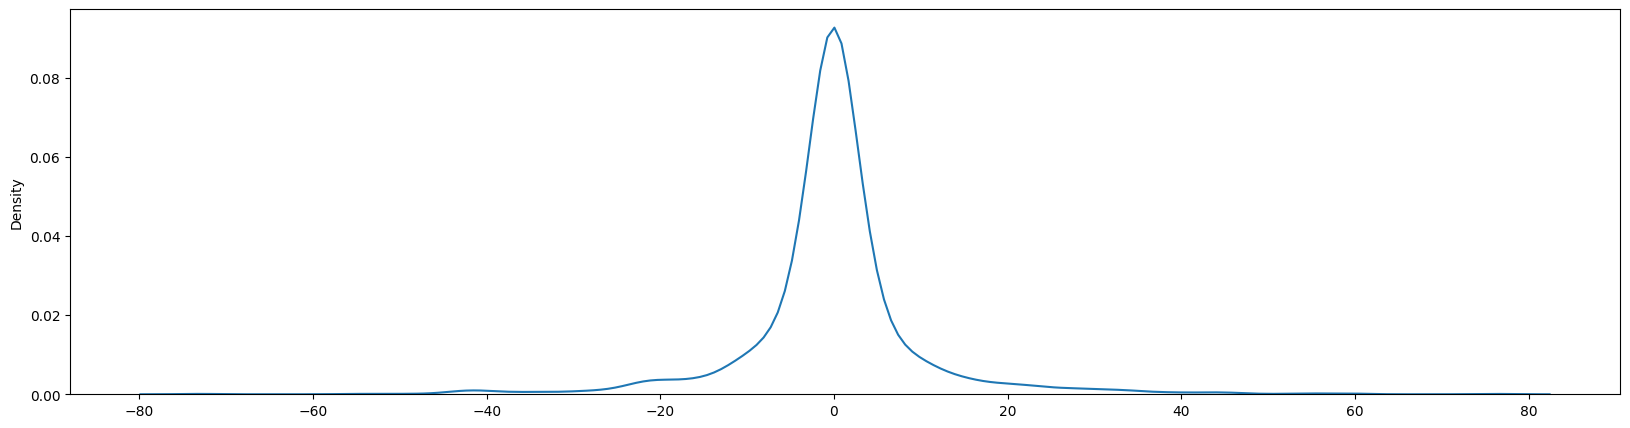

In [ ]:
ReturnsInPct = (dfMain['Open'] - dfMain['Close'])/100
print(ReturnsInPct)
sns.distplot(ReturnsInPct, hist=False)

#Наблюдения : 
print("the mean value of the Closing prices is around : ", ReturnsInPct.mean())
print("the median value of the Closing prices is around : ", ReturnsInPct.median())
print("the iqr value of the Closing prices is around : ", ReturnsInPct.quantile(0.75)-ReturnsInPct.quantile(0.25))

<ipython-input-14-a72fd04ade58>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['Volume'], hist=False)


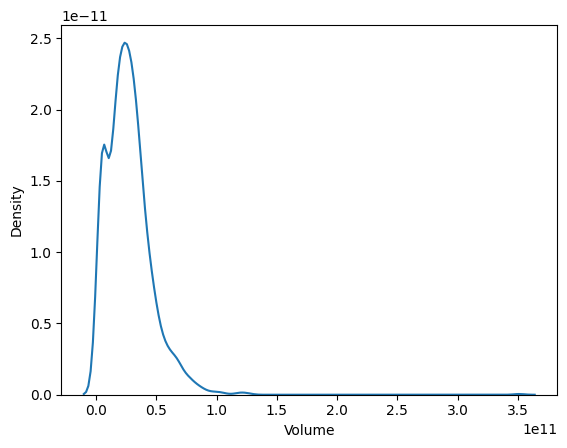

the mean value of the Volume is around :  27538290654.23317
the median value of the Volume is around :  25303206547.0
the iqr value of the Volume is around :  20698105138.0


In [ ]:
sns.distplot(df1['Volume'], hist=False)
plt.xlabel('Volume')
plt.show()

#Наблюдения : 
print("the mean value of the Volume is around : ", df1['Volume'].mean())
print("the median value of the Volume is around : ", df1['Volume'].median())
print("the iqr value of the Volume is around : ", df1['Volume'].quantile(0.75)-df1['Volume'].quantile(0.25))

Двумерный анализ (Bi-variate analysis)

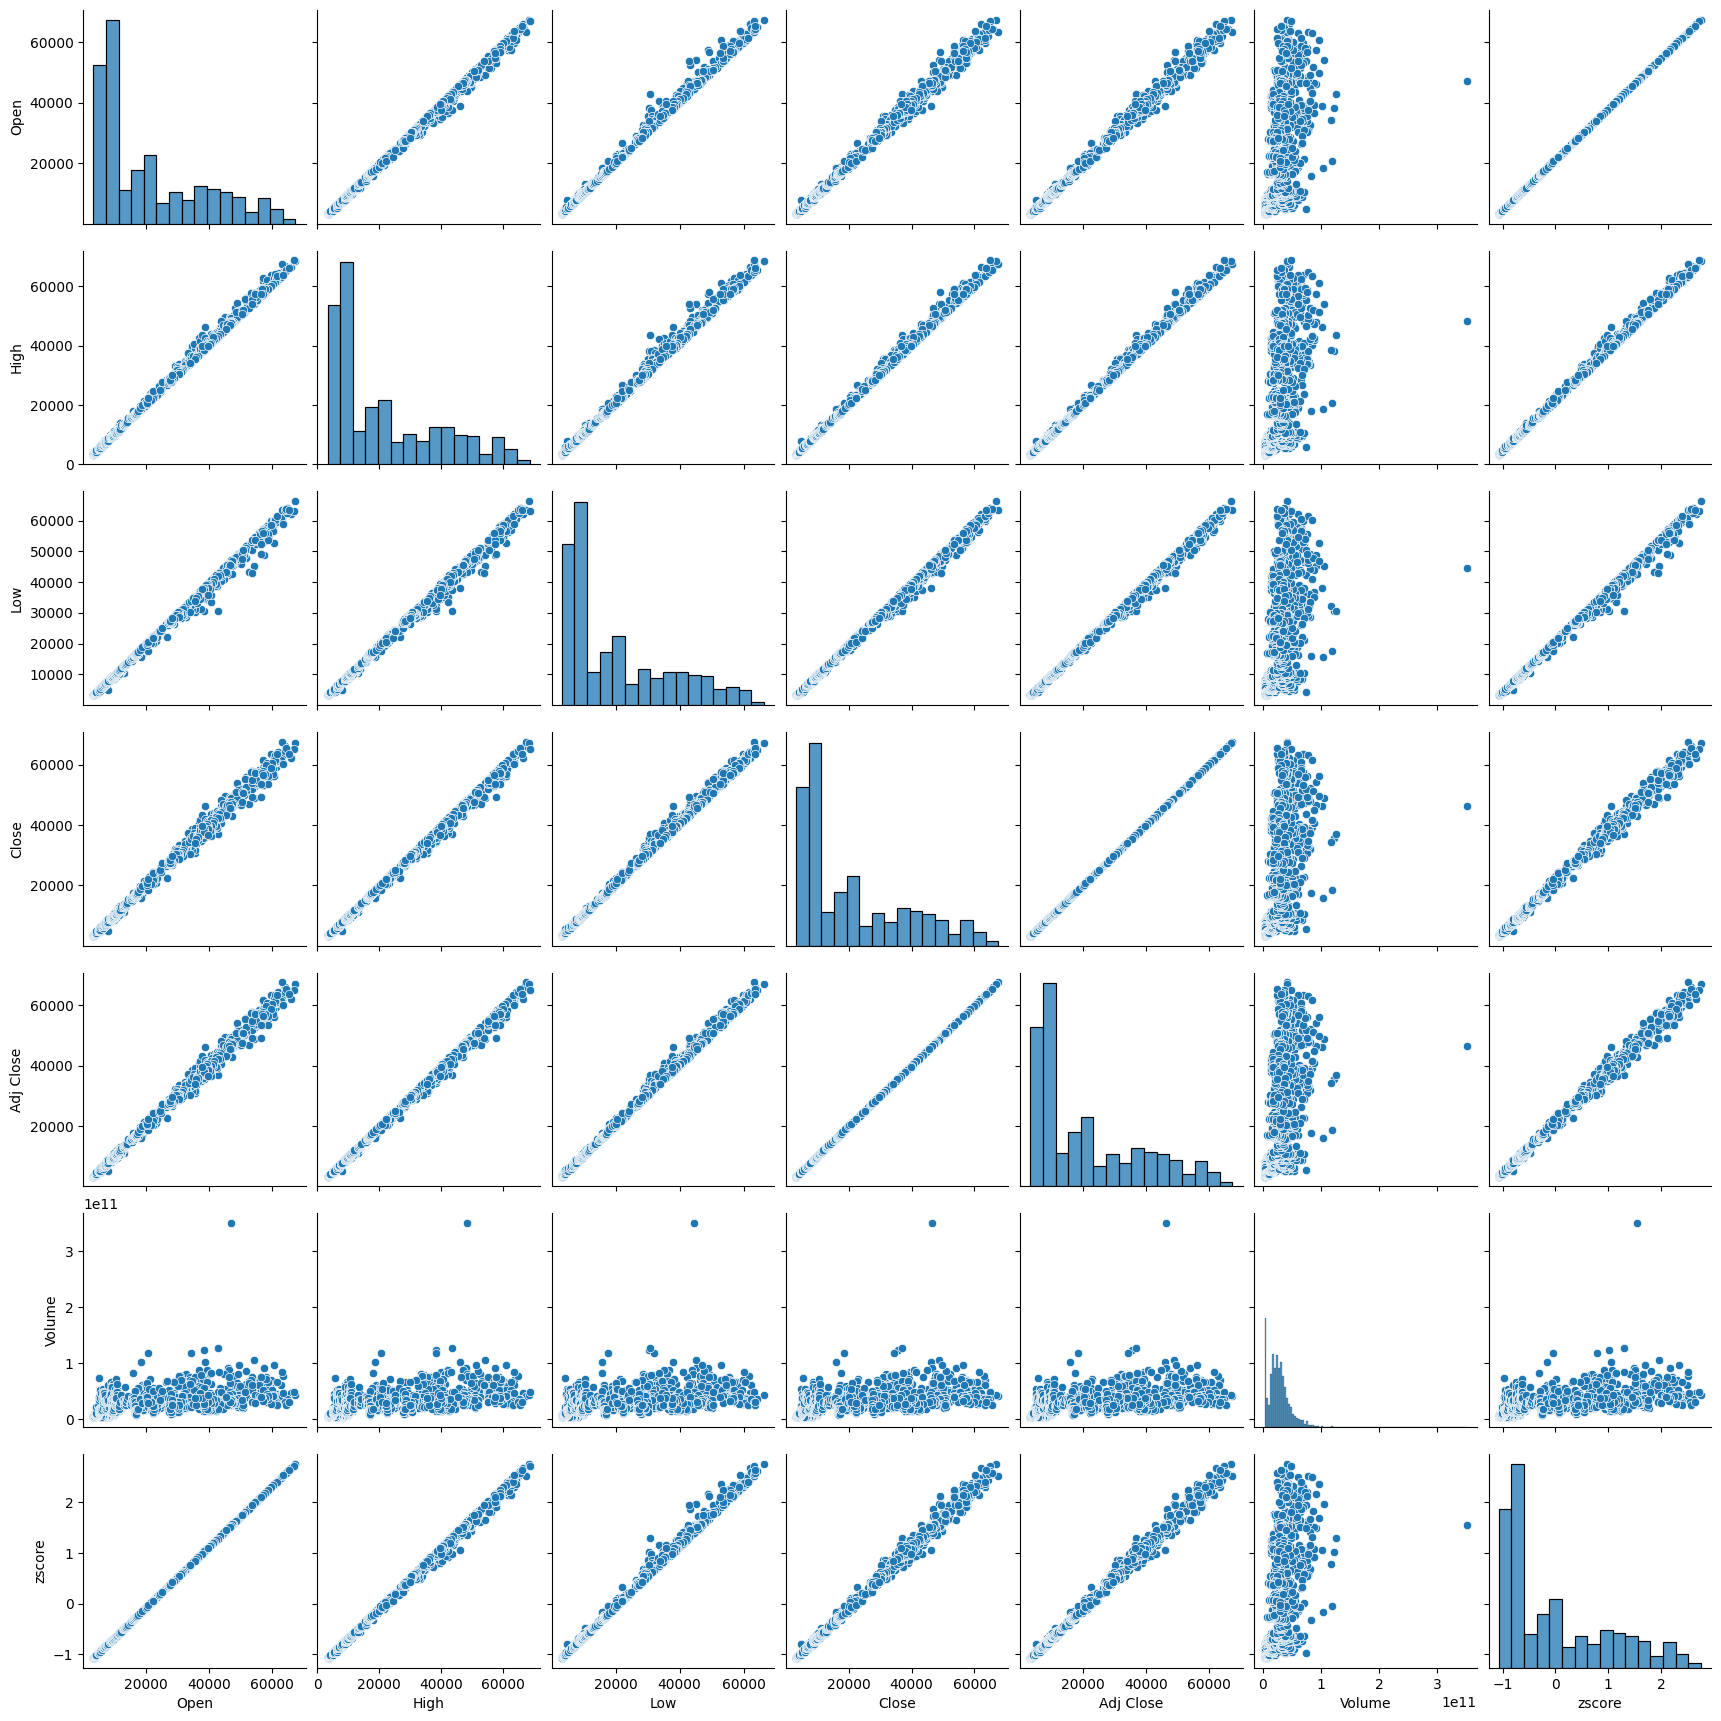

In [ ]:
#Анализ взаимосвязей между значений столбцов

sns.pairplot(df1)

In [ ]:
#Наблюдения: как мы можем видеть, графики действительно демонстрируют ту же корреляцию, что и одноименная карта. 
#Там где коэффициент корреляции равен 1 (почти везде, там, где на графике возрастающая прямая), переменные непросто зависимы 
#Вторая переменная целиком и полностью формируется на основе другой переменной
#Например: цена открытия - целиком и полностью формируется на основе цены закрытия

Шаг 4: Работа с выбросами (идентификация и удаление)

Text(0.5, 1.0, 'High vs Low')

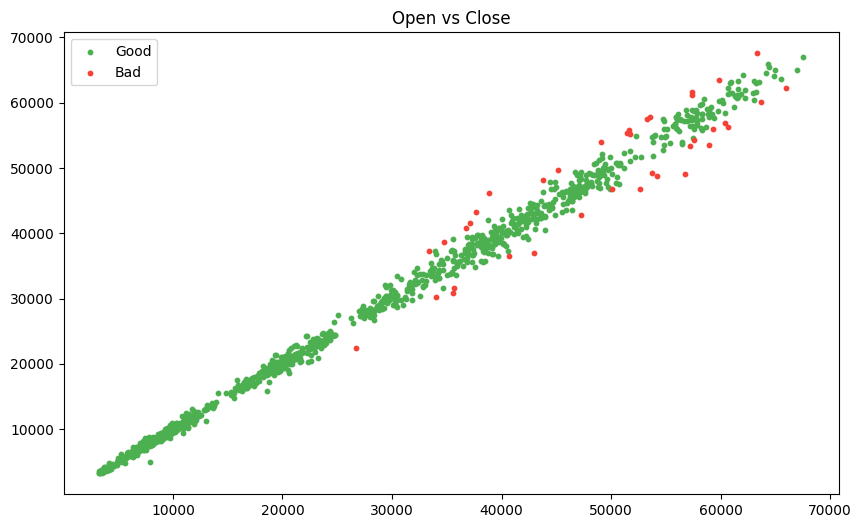

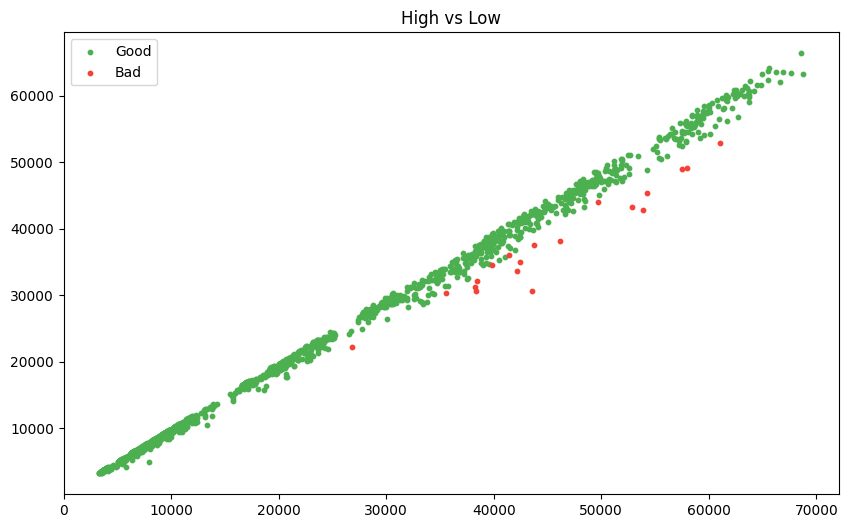

In [ ]:
##Давайте удалим уникальные события, искажающих реальное положение дел


#Let remove Outliers using Probability Density Function for 'Price' and 'Close'

from scipy.stats import norm
from scipy.stats import multivariate_normal as mn

dfX = df[['Open', 'Close']]

mean, cov = np.mean(dfX, axis=0), np.cov(dfX.T)
good = mn(mean, cov).pdf(dfX) > 0.000000001 / 100


plt.figure(figsize=(10, 6))

plt.scatter(df[good]['Open'], df[good]['Close'], s=10, label="Good", color="#4CAF50")
plt.scatter(df[~good]['Open'], df[~good]['Close'], s=10, label="Bad", color="#F44336")
plt.legend()
plt.title("Open vs Close")



#Let remove Outliers using Probability Density Function for 'High' and 'Low'

dfY = df[['High', 'Low']]

mean, cov = np.mean(dfY, axis=0), np.cov(dfY.T)
good = mn(mean, cov).pdf(dfY) > 0.000000001 / 100


plt.figure(figsize=(10, 6))

plt.scatter(df[good]['High'], df[good]['Low'], s=10, label="Good", color="#4CAF50")
plt.scatter(df[~good]['High'], df[~good]['Low'], s=10, label="Bad", color="#F44336")
plt.legend()
plt.title("High vs Low")

Let visualize the results

<Axes: >

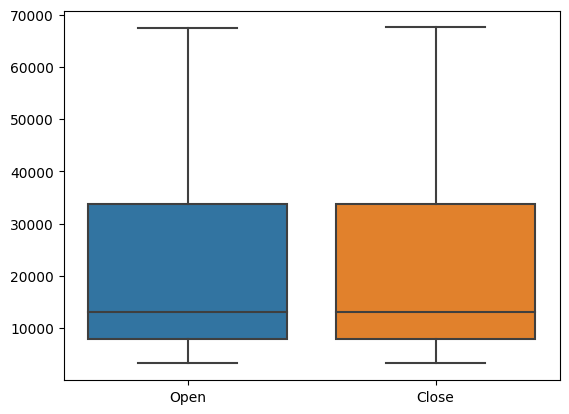

In [ ]:
#1: Для цен "Открытия" и "Закрытия"

sns.boxplot(dfX)

<Axes: >

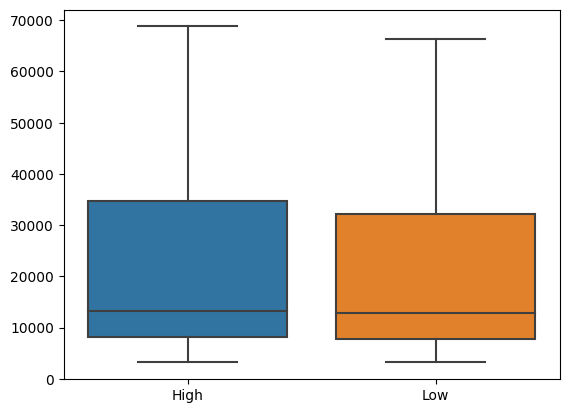

In [ ]:
#2: Для "Наибольшей" и "Наименьшей" цены
sns.boxplot(dfY)

Шаг 5: Нормализация данных

[[0.08755625 0.09167673 0.08760437 0.09396459 0.09396459 0.01737391]
 [0.09413823 0.09311092 0.09171826 0.08938726 0.08938726 0.01333916]
 [0.08867498 0.09366988 0.09084693 0.09500563 0.09500563 0.01402641]
 ...
 [0.3786992  0.37708751 0.37789618 0.37756184 0.37756184 0.04246477]
 [0.37750416 0.38305714 0.38006551 0.3897219  0.3897219  0.0425512 ]
 [0.38941834 0.40785724 0.39675932 0.40962767 0.40962767 0.06598149]]
          Open      High       Low     Close  Adj Close    Volume
0     0.087556  0.091677  0.087604  0.093965   0.093965  0.017374
1     0.094138  0.093111  0.091718  0.089387   0.089387  0.013339
2     0.088675  0.093670  0.090847  0.095006   0.095006  0.014026
3     0.095006  0.095492  0.094989  0.096103   0.096103  0.017036
4     0.096245  0.094663  0.094563  0.093328   0.093328  0.016522
...        ...       ...       ...       ...        ...       ...
1822  0.373633  0.375441  0.379458  0.382103   0.382103  0.029313
1823  0.382189  0.374649  0.383110  0.378588   0.378

<ipython-input-17-34002a126288>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(normalized_data)


<Axes: ylabel='Density'>

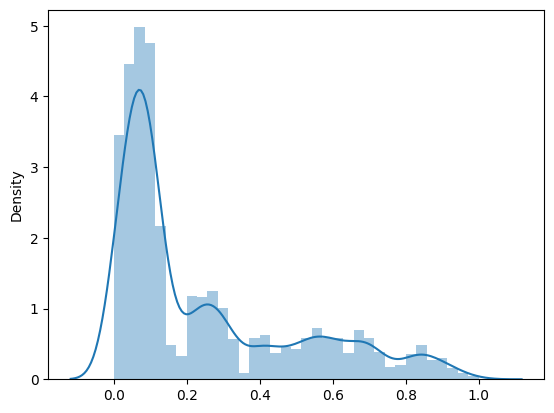

In [ ]:
#Подготовка данных к моделям машинного обучения


scaler = MinMaxScaler()

normalized_data = scaler.fit_transform(df1)

print(normalized_data)


#Конвертируем нормализованные данные в специальный дата-фрэйм:

normalized_df = pd.DataFrame(normalized_data, columns=df1.columns)

print(normalized_df)

sns.distplot(normalized_data)


#from scipy.stats import zscore
#df1['zscore'] = zscore(df1['Open'])
#print(sns.distplot(df1['zscore']))

###Prediction-Model: ARIMA (Не закончено)

Step 1:

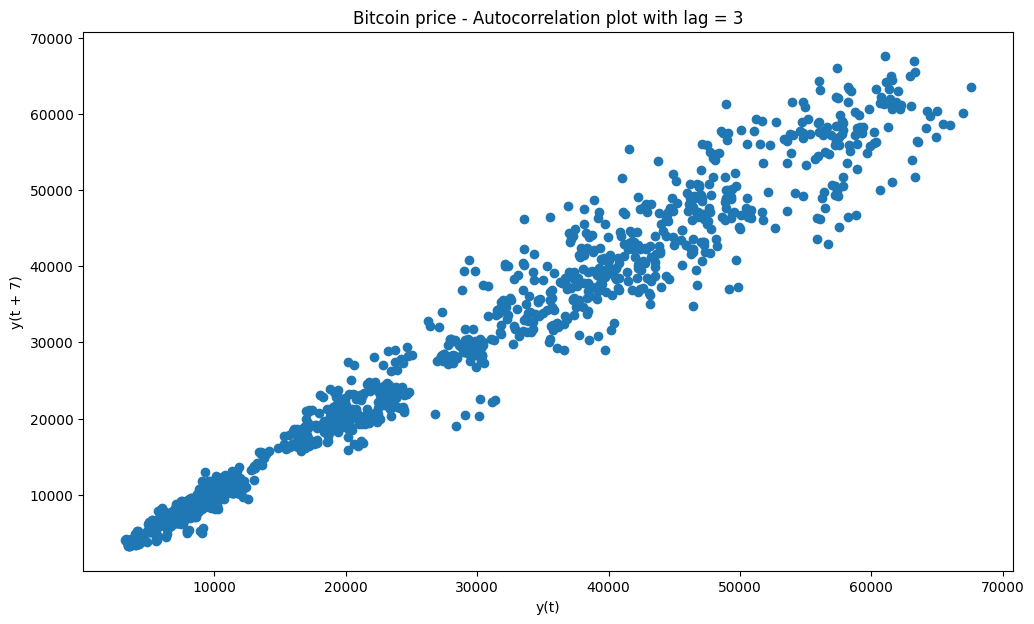

In [32]:
#Before building the ARIMA model, let’s see if there is some cross-correlation in out data.

from pandas.plotting import lag_plot

plt.figure()
lag_plot(df['Close'], lag=7)
plt.title('Bitcoin price - Autocorrelation plot with lag = 7')
plt.show()

In [ ]:
#Augmented Dickey-Fuller test 

from statsmodels.tsa.stattools import adfuller
result = adfuller(df1['Close'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
  print('\t%s: %.3f' % (key, value))

#Вывод: наш временной ряд является нестационарным, т.к. p-value > 0,05 ((5%))

ADF Statistic: -1.403527
p-value: 0.580584
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568


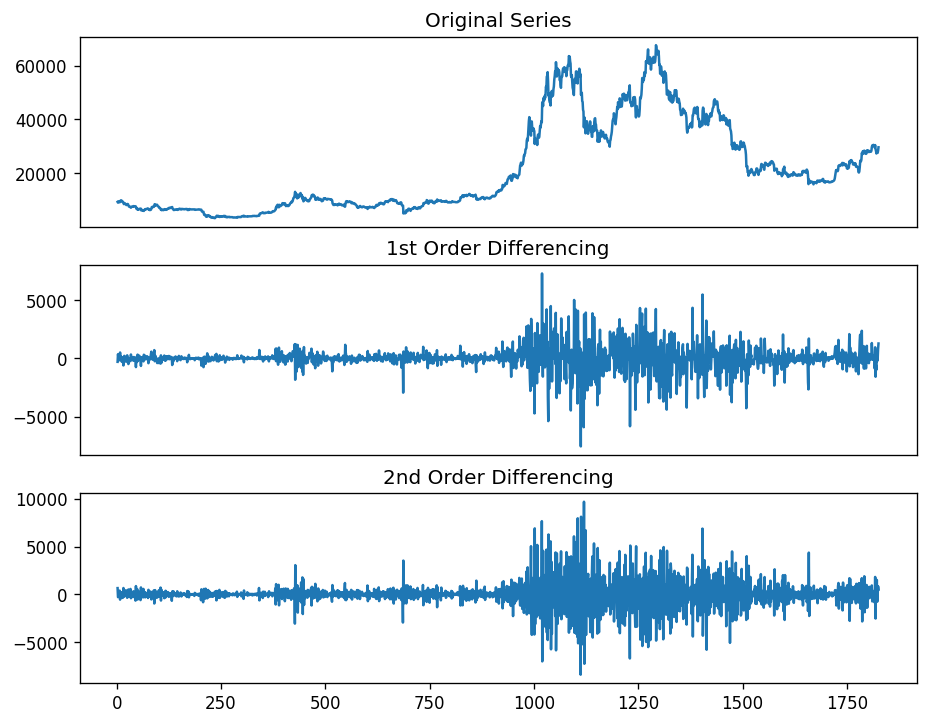

In [ ]:
# Finding the value of the d parameter 

# Сезонное дифференциирование с lag = 7 (число дней в сезонности: каждые 7 дней повторяется ситуация)

# d-значение = 1, поскольку мы сделали дифференциирование первого порядка равного сезонной компоненте

# q-значение = размер окна скользящего среднего = 7

import numpy as np, pandas as pd
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})
 
# Original Series
fig, (ax1, ax2, ax3) = plt.subplots(3)
ax1.plot(df.Close); ax1.set_title('Original Series'); ax1.axes.xaxis.set_visible(False)
# 1st Differencing
ax2.plot(df.Close.diff()); ax2.set_title('1st Order Differencing'); ax2.axes.xaxis.set_visible(False)
# 2nd Differencing
ax3.plot(df.Close.diff().diff()); ax3.set_title('2nd Order Differencing')
plt.show()

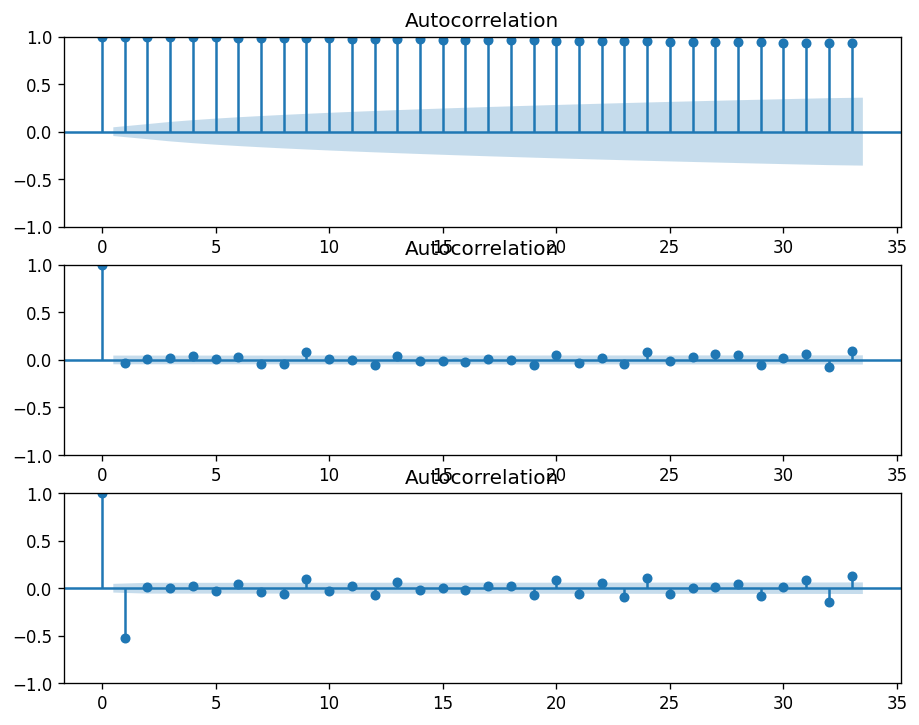

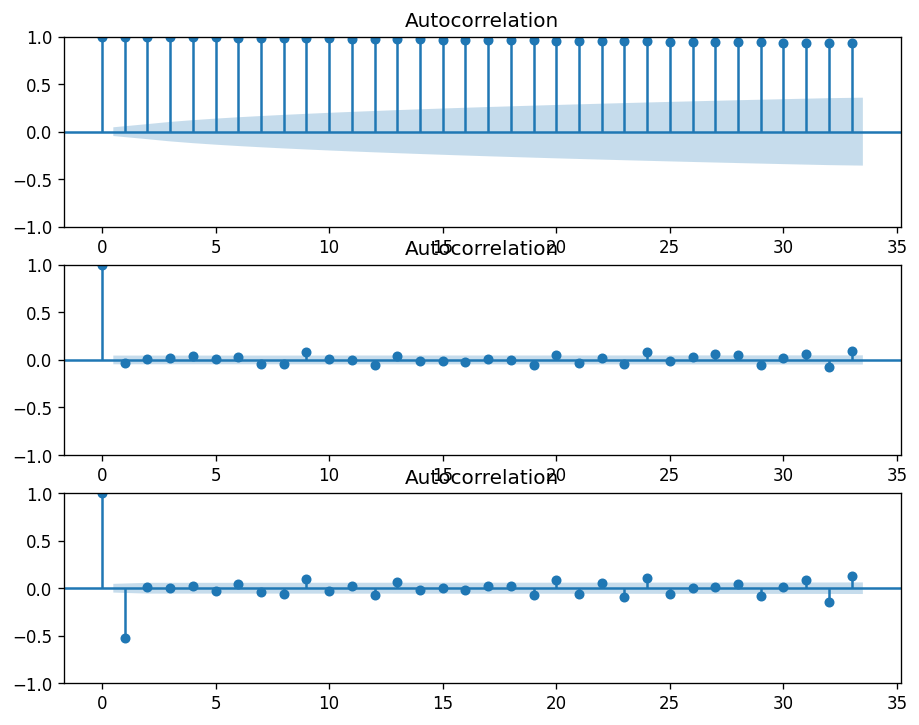

In [ ]:
#Let verify the results using an autocorrelation plot

from statsmodels.graphics.tsaplots import plot_acf
fig, (ax1, ax2, ax3) = plt.subplots(3)
plot_acf(df.Close, ax=ax1)
plot_acf(df.Close.diff().dropna(), ax=ax2)
plot_acf(df.Close.diff().diff().dropna(), ax=ax3)

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


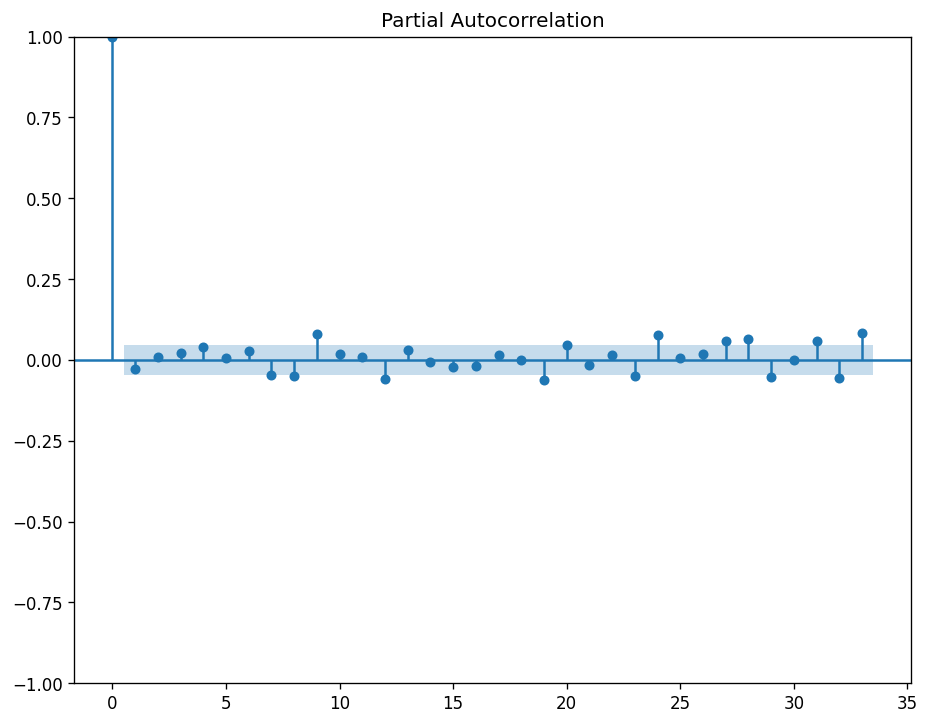

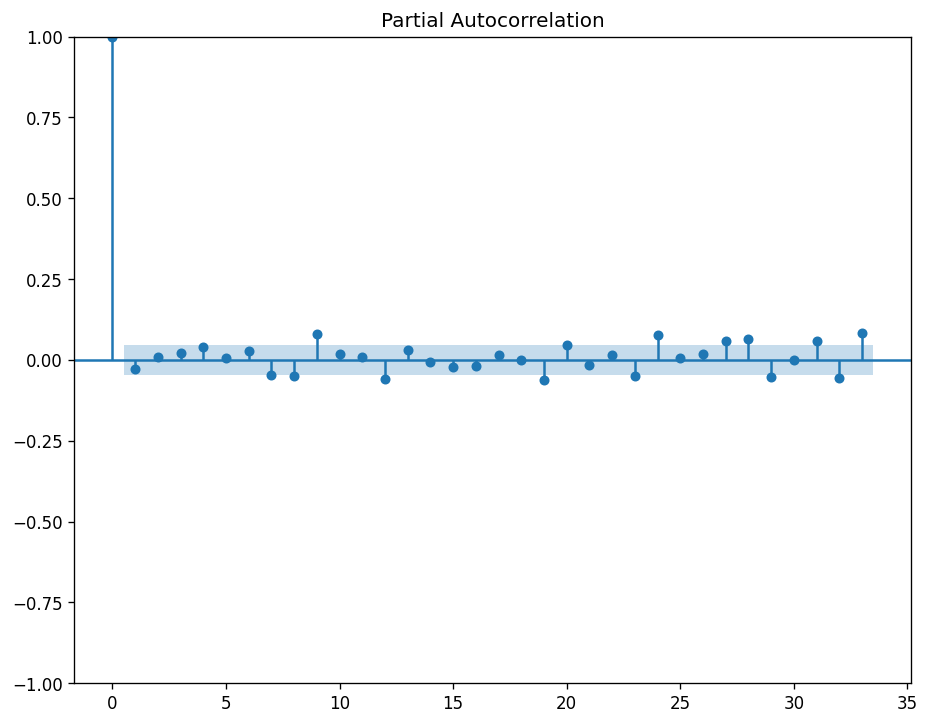

In [ ]:
#Finding the value of the p parameter

from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(df.Close.diff().dropna())

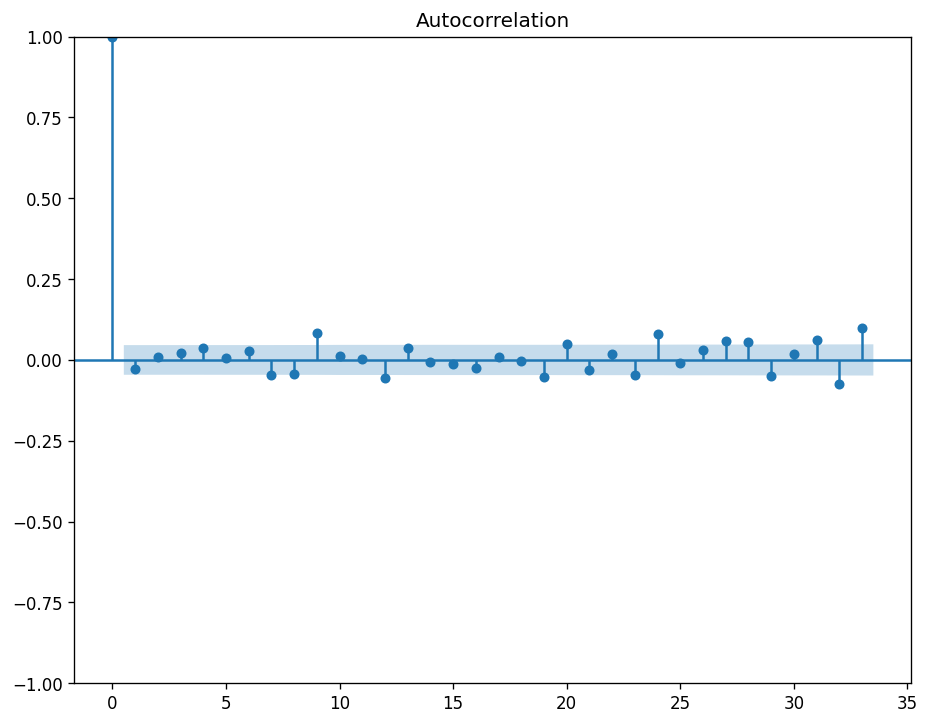

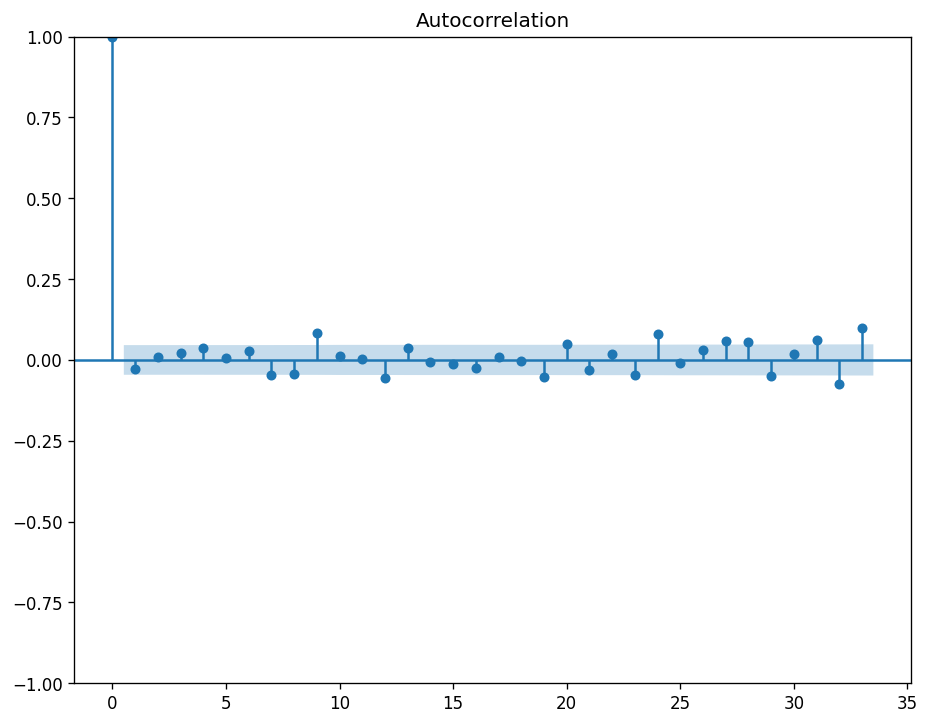

In [ ]:
#Finding the value of the q parameter

plot_acf(df.Close.diff().dropna())

In [ ]:
#Сплитим его либо на двухкомпонентный датасет

train_data, test_data = df[0:int(len(df)*0.7)], df[int(len(df)*0.7):]
training_data = train_data['Close'].values
testing_data = test_data['Close'].values


# подготовка

model_predictions = []
N_test_observations = len(test_data)
history = [x for x in training_data]


#ARIMA

from statsmodels.tsa.arima.model import ARIMA
for i in range(N_test_observations):
    # прогноз
    model = ARIMA(training_data, order=(4,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(yhat)
    # наблюдения
    actual_test_value = testing_data[i]
    history.append(actual_test_value)

In [ ]:
#Let add the results

pd.concat([pd.DataFrame(model_predictions,index=test_data.index,columns=['predictions']),test_data],axis=1)

,predictions,Date,Open,High,Low,Close,Adj Close,Volume
1278,60716.721437,2021-10-25,60893.925781,63729.324219,60691.800781,63039.824219,63039.824219,31064911614
1279,60716.721437,2021-10-26,63032.761719,63229.027344,59991.160156,60363.792969,60363.792969,34878965587
1280,60716.721437,2021-10-27,60352.000000,61435.183594,58208.187500,58482.386719,58482.386719,43657076893
1281,60716.721437,2021-10-28,58470.730469,62128.632813,58206.917969,60622.136719,60622.136719,45257083247
1282,60716.721437,2021-10-29,60624.871094,62927.609375,60329.964844,62227.964844,62227.964844,36856881767
...,...,...,...,...,...,...,...,...
1822,60716.721437,2023-04-22,27265.894531,27872.142578,27169.570313,27817.500000,27817.500000,13125734602
1823,60716.721437,2023-04-23,27816.144531,27820.244141,27400.314453,27591.384766,27591.384766,12785446832
1824,60716.721437,2023-04-24,27591.730469,27979.982422,27070.849609,27525.339844,27525.339844,17703288330
1825,60716.721437,2023-04-25,27514.873047,28371.078125,27207.931641,28307.597656,28307.597656,17733373139


NameError: ignored

In [ ]:
#Visualising the results

plt.plot(model_predictions

NameError: ignored

ValueError: ignored